In [3]:
from keras.models import Sequential                                                                
from keras.layers import Dense                                                                     
from keras import losses, optimizers                                                               
import numpy as np                                                                                 
from sklearn import datasets                                                                       

data = datasets.load_breast_cancer()                                                           
                                                                                                       
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
from sklearn import preprocessing
from sklearn import model_selection

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data.data, data.target, test_size=0.33)

In [8]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
model = Sequential()
model.add(Dense(units=100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_6 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 7,181
Trainable params: 7,181
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, epochs=30, batch_size=16, verbose=1, validation_split=0.3)




Train on 266 samples, validate on 115 samples
Epoch 1/30





266/266 [==============================] - 7s 25ms/step - loss: 0.5272 - acc: 0.7293 - val_loss: 0.3314 - val_acc: 0.9304
Epoch 2/30
266/266 [==============================] - 0s 640us/step - loss: 0.2564 - acc: 0.9474 - val_loss: 0.2023 - val_acc: 0.9391
Epoch 3/30
266/266 [==============================] - 0s 530us/step - loss: 0.1557 - acc: 0.9549 - val_loss: 0.1510 - val_acc: 0.9565
Epoch 4/30
266/266 [==============================] - 0s 637us/step - loss: 0.1121 - acc: 0.9737 - val_loss: 0.1237 - val_acc: 0.9652
Epoch 5/30
266/266 [==============================] - 0s 597us/step - loss: 0.0886 - acc: 0.9850 - val_loss: 0.1102 - val_acc: 0.9652
Epoch 6/30
266/266 [==============================] - 0s 629us/step - loss: 0.0744 - acc: 0.9850 - val_loss: 0.1001 - val_acc: 0.9739
Epoch 7/30
266/266 [==============================] - 0s 777us/step - loss: 0.0642 - acc: 0.9887 - val_loss: 0.0967 - val_acc: 0.9652
Epoch 8/3

In [15]:
from matplotlib import pyplot as plt

In [17]:
epochs = history.epoch
loss = history.history['loss']
validation_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

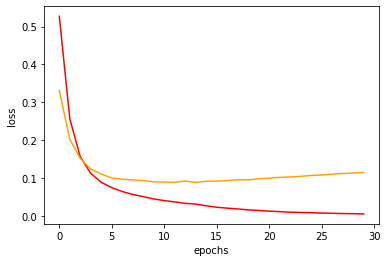

In [19]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')

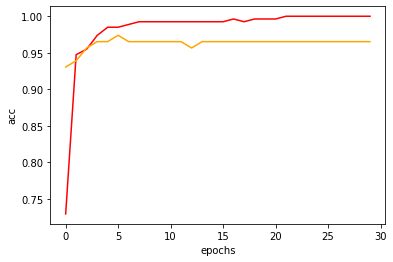

In [21]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, val_acc, c='orange', label='validation')

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

188/188 [==============================] - 0s 492us/step


In [23]:
print(test_loss)

0.03983803156842577


In [24]:
print(test_acc)

0.9893617046640274


In [25]:
from keras.datasets import mnist

In [26]:
from keras.layers import Dropout, Flatten

In [27]:
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [28]:
batch_size = 128
epochs = 12

In [71]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

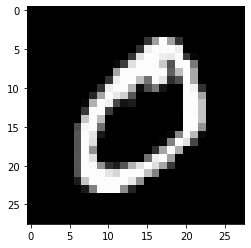

In [72]:
plt.imshow(x_train[1], cmap='gray')

In [73]:
x_train = x_train[0:1000]
y_train = y_train[0:1000]
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape =(img_rows, img_cols, 1)

In [74]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [75]:
import keras

In [76]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [77]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, kernel_size= (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [78]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [79]:
model.fit(x_train, y_train, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 10000 samples
Epoch 1/12
1000/1000 [==============================] - 31s 31ms/step - loss: 1.0626 - acc: 0.6600 - val_loss: 0.5049 - val_acc: 0.8379
Epoch 2/12
1000/1000 [==============================] - 25s 25ms/step - loss: 0.3631 - acc: 0.8830 - val_loss: 0.4053 - val_acc: 0.8738
Epoch 3/12
1000/1000 [==============================] - 25s 25ms/step - loss: 0.2096 - acc: 0.9390 - val_loss: 0.3354 - val_acc: 0.8988
Epoch 4/12
1000/1000 [==============================] - 25s 25ms/step - loss: 0.1142 - acc: 0.9700 - val_loss: 0.3310 - val_acc: 0.8965
Epoch 5/12
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0782 - acc: 0.9750 - val_loss: 0.2716 - val_acc: 0.9182
Epoch 6/12
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0241 - acc: 0.9940 - val_loss: 0.2902 - val_acc: 0.9240
Epoch 7/12
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.3192 - val_acc: 0.9184

In [80]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test acc:", score[1])

Test loss: 0.3640982189257513
Test acc: 0.9248


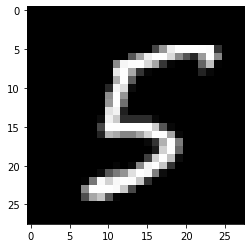

In [91]:
plt.imshow(x_test[23].reshape(28,28), cmap='gray')

In [92]:
print(model.predict_classes(x_test[23].reshape(1,28,28,1)))

[5]


In [93]:
print(model.predict(x_test[23].reshape(1,28,28,1)))

[[3.1967440e-10 1.2566474e-13 9.9705704e-13 2.0226862e-08 5.5474630e-10
  9.9999988e-01 4.5431967e-11 2.3324640e-16 1.7131030e-07 7.0258651e-12]]
